In [ ]:
import cv2
print(cv2.__version__)
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
from scipy.spatial import KDTree
from webcolors import (
    css3_hex_to_names,
    hex_to_rgb,
)
import re
import sklearn

4.1.2


ImportError: ignored

In [ ]:
pip install webcolors

[[[20 19 28]
  [ 0  0  6]
  [30 29 38]
  ...
  [ 0  0  7]
  [ 5  4 13]
  [15 14 23]]

 [[ 0  0  6]
  [13 12 21]
  [18 17 26]
  ...
  [ 1  0 10]
  [ 9  8 17]
  [17 16 25]]

 [[12 11 20]
  [11 10 19]
  [ 1  0  9]
  ...
  [10  9 19]
  [16 15 24]
  [21 20 29]]

 ...

 [[ 7  4 19]
  [16 14 26]
  [17 15 27]
  ...
  [ 6  5 14]
  [ 6  5 14]
  [ 7  6 15]]

 [[12  9 24]
  [13 11 23]
  [ 5  3 15]
  ...
  [ 2  1 10]
  [ 3  2 11]
  [ 4  3 12]]

 [[14 11 26]
  [ 5  3 15]
  [ 2  0 12]
  ...
  [ 0  0  7]
  [ 0  0  8]
  [ 1  0  9]]]


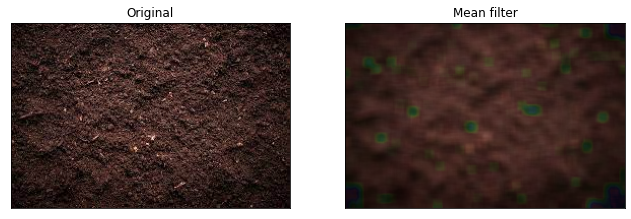

In [ ]:
image = cv2.imread('/content/soilimg.jpeg') # reads the image
print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
#convert to HSV
figure_size = 9
#the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

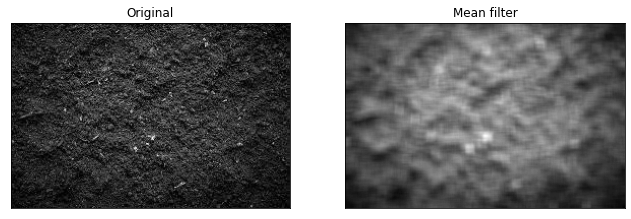

In [ ]:
#MEAN FILTER
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

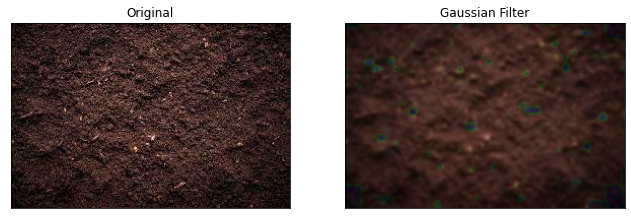

In [ ]:
#GAUSSIAN FILTER
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

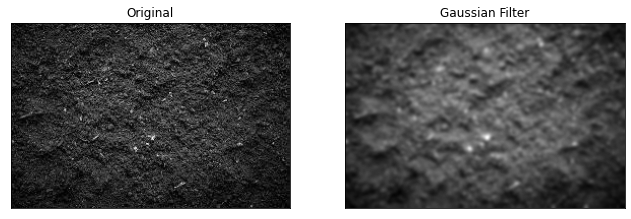

In [ ]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

FileNotFoundError: ignored

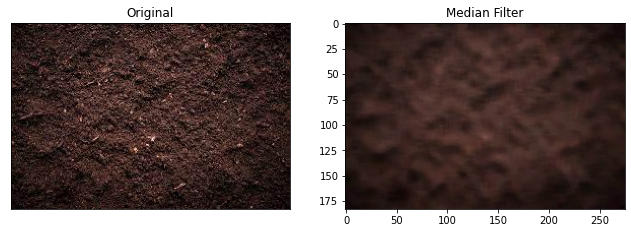

In [ ]:
#MEDIAN FILTER
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.savefig('C:/Users/HP/Desktop/stream/soil/soilpreprocessed/pre1.jpg', dpi=300, bbox_inches='tight')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])

plt.show()

# k-MEANS CLUSTERING ALGORITHM FOR IMAGE CLASSIFICATION


In [ ]:
#K-MEANS CLUSTERING METHOD FOR IMAGE SEGMENTATION
image = cv2.imread('C:/Users/HP/Desktop/stream/soil/soilpreprocessed/pre1.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
pixel_vals = image.reshape((-1,3))
#Convert to float type
pixel_vals = np.float32(pixel_vals)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  # then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 1

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
  
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)
plt.savefig('C:/Users/HP/Desktop/stream/soil/soilprocessed/i1.jpg', dpi=300, bbox_inches='tight')

In [ ]:
filename = "C:/Users/HP/Desktop/stream/soil/soilprocessed/i1.jpg"
img = Image.open(filename)
img.show()
colors = img.getpixel((200,300))
print(colors)

In [ ]:
df = pd.read_csv ('C:/Users/HP/Desktop/stream/soil/soiltypes/colors.csv')
print(df)

In [ ]:
R=colors[0]
G=colors[1]
B=colors[2]
print("THE VALUE OF R IS:",R)
print("THE VALUE OF G IS:",G)
print("THE VALUE OF B IS:",B)

In [ ]:

def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'


In [ ]:
color_name=str(convert_rgb_to_names((colors)))
print((color_name))

In [ ]:
red_soil = ["Red Soil","red","madder", "crimson", "carmine","reddish","salmonpink","brinkpink"]
black_soil = ["Black Soil","black","dimgray","ebony", "taupe", "charcoal","blackbean","salmonpink"]
laterite_soil=["Laterite Soil","yellow","brown","rosy_brown","reddish_brown","sienna"]
Alluvial_soil=["Alluvial Soil","grey","light grey","ash grey"]
Desert_soil=["Desert Soil","gold","sand color"]
Mountain_soil=["Mountain Soil","dark brown","brown"]
alkaline_soil=["Alkaline Soil","white"]
peaty_soil=["peaty&marshy Soil","black"]

soils=[red_soil,black_soil,laterite_soil,Alluvial_soil,Desert_soil,Mountain_soil,alkaline_soil,peaty_soil]

for i in range(0,len(soils)):
    c=0
    for j in range(1,len(soils[i])):
        if re.search(soils[i][j], str(color_name)):
            c=1
            break
    if(c==1):
        print(soils[i][0])


In [ ]:
ds = pd.read_csv ('C:/Users/HP/Desktop/stream/soil/ph-data.csv')
print(ds)

In [ ]:
#count_plot

ds_plot = ds.label.value_counts()
ds_plot.plot(kind = 'bar',color='gold')
plt.xticks(rotation=45)

In [ ]:
#selecting X and y for classification.
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
#reshaping y for regression.
y = y.reshape(len(y),1)
print(y)

In [ ]:
#scaling the independent variable.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
#splitting the dataset into test and training.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#importing the packages.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

SEED = 1

#variable initiation.
rf = RandomForestRegressor(random_state = SEED)
dt = DecisionTreeRegressor(random_state = 0)
svr = SVR(kernel = 'rbf')
ridge = Ridge(alpha=0.1, normalize=True)
lr = LinearRegression()

#storing in an array.
regressors = [('Multiple Linear Regression', lr),
              ('Ridge Regression', ridge),
              ('SVM', svr),
              ('Decision Tree', dt),
              ('Random Forest', rf)]

In [ ]:
for reg_name, reg in regressors:
    
    #fit the model.
    reg.fit(X_train, y_train)
    
    #predicting test set results.
    y_pred = reg.predict(X_test)
    
    #reshaping into former form.
    np.set_printoptions(precision=2)
    np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
    
    #printing r2_score.
    print('{:s} : {:f}'.format(reg_name, r2_score(y_test, y_pred)))

In [ ]:
import joblib
joblib.dump(lr, 'model.pkl')

In [ ]:
print(R,G,B)

In [ ]:
from sklearn.preprocessing import StandardScaler
comment = [R,G,B]

In [ ]:
ds = pd.read_csv('C:/Users/HP/Desktop/stream/soil/ph-data.csv')
Z = ds.iloc[:, :-1]
Z.loc[len(Z)] = comment
Z = Z.values
print(Z)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(Z)

In [ ]:
model = joblib.load('C:/Users/HP/Desktop/stream/soil/model.pkl')
pred = model.predict(X)[-1]
print(pred)